<a href="https://colab.research.google.com/github/gustavofelicidade/CNN_recognize_captcha_by_tensorflow/blob/main/classificador_cyberlabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificador capaz de diferenciar os números 0 e 5 do dataset MNIST.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import cv2

import tensorflow as tf

from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
tf.__version__  # Verificar a versão do Tensorflow usar os parâmetros conscientemente.

'2.6.0'

**Python Random seed() Method**

Usar este parâmetro garante que qualquer pessoa que execute novamente seu código obterá exatamente os mesmos resultados.

*O método seed () é usado para inicializar o gerador de números aleatórios.*

In [4]:
# fix random aleatória para reprodutibilidade
seed = 7
np.random.seed(seed)

A biblioteca de Deep Learning **Keras** fornece um método conveniente para carregar o conjunto de dados MNIST:


In [3]:
# Carregar o dataset MNIST 
# Este dataset é basicamente de caractéres escritos a mão no formato de imagens de 28x28 de tamanho de números de 0 a 9.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() # e dividir o dataset entre treino e teste



In [36]:
# Verificando o tamanho da imagem original
X_train[0].shape

(28, 28)

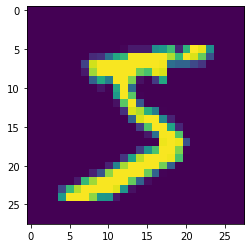

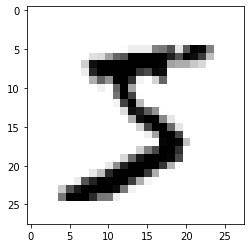

In [5]:
# Exibindo a primeira amostra do dataset de treino

plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap= plt.cm.binary)
plt.show()

Verificar os valores de cada pixel antes da normalização

In [6]:
print(X_train[0])  # antes da normalização

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

**Como as imagens estão em nível de cinza (1 canal ==> 0 a 255), não coloridas RGB)**

# Normalizando os dados | Pré processo

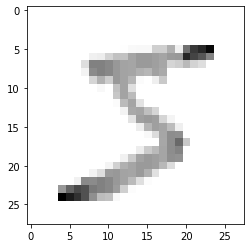

In [7]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test  = tf.keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[0], cmap= plt.cm.binary)
plt.show()

Depois da Normalização


In [8]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])
print(y_train[10])

5
3


# Redimensionar a imagem para torná-la adequada para aplicar a Operação de convolução

In [10]:
IMG_SIZE=28
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1 )
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1 )
print("Dimensões de amostras de treinamento", X_trainr.shape)
print("Dimensões de amostras de teste", X_testr.shape)

Dimensões de amostras de treinamento (60000, 28, 28, 1)
Dimensões de amostras de teste (10000, 28, 28, 1)


# Classificando somente os 0's e 5´s

Como queremos desenvolver um classificador que reconheça o 0 e o 5 filtraremos as labels de interesse.

Ao final deste modelo iremos apresentar um número para a máquina e ela será capaz de reconhecer os números com 99% de acurácia.

In [11]:
# Verificando Tamanho do Data Set Original

print("Número de exemplos de treinamento original:", len(X_trainr))
print("Número de exemplos de teste originais:", len(X_testr))

Número de exemplos de treinamento original: 60000
Número de exemplos de teste originais: 10000


In [12]:
train_filter = np.where((y_train == 0 ) | (y_train == 5))
test_filter = np.where((y_test == 0) | (y_test == 5))

In [13]:
X_trainr, y_train = X_trainr[train_filter], y_train[train_filter]
X_testr, y_test = X_testr[test_filter], y_test[test_filter]

In [14]:
print("Número de exemplos de treinamento filtrados:", len(X_trainr))
print("Número de exemplos de teste filtrados:", len(X_testr))

Número de exemplos de treinamento filtrados: 11344
Número de exemplos de teste filtrados: 1872


# **Criando a Deep Neural Network**

**Treinando em 60.000 amostras do dataset MNIST**

In [15]:
# Criando o Modelo de redes neurais agora
model = Sequential()

# Primeira Camada de Convolucão
model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Segunda Camada de Convolucão
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Terceira Camada de Convolucão
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Camada totalmente conectada 1°
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Camada totalmente conectada 2°
model.add(Dense(64))
model.add(Activation("relu"))

# Última Camada de Convolucão
model.add(Dense(10))
model.add(Activation("softmax"))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [17]:
print("Total training samples = ", len(X_trainr))

Total training samples =  11344


In [18]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
model.fit(X_trainr, y_train, epochs=5, validation_split= 0.3) # Treinando o modelo

Epoch 1/5
249/249 [==============================] - 4s 10ms/step - loss: 0.2089 - accuracy: 0.9228 - val_loss: 0.0321 - val_accuracy: 0.9885
Epoch 2/5
249/249 [==============================] - 2s 10ms/step - loss: 0.0210 - accuracy: 0.9921 - val_loss: 0.0190 - val_accuracy: 0.9938
Epoch 3/5
249/249 [==============================] - 2s 9ms/step - loss: 0.0163 - accuracy: 0.9937 - val_loss: 0.0140 - val_accuracy: 0.9956
Epoch 4/5
249/249 [==============================] - 2s 9ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.0182 - val_accuracy: 0.9947
Epoch 5/5
249/249 [==============================] - 2s 10ms/step - loss: 0.0080 - accuracy: 0.9966 - val_loss: 0.0107 - val_accuracy: 0.9959


In [20]:
# Evaluating no teste data set Mninst

test_loss, test_acc = model.evaluate(X_testr, y_test)
print("Teste Loss em 10,000 testes de amostra", test_loss)
print("Validação de Acurácia em 10,000 testes de amostra", test_acc)

59/59 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 0.9963
Teste Loss em 10,000 testes de amostra 0.014908279292285442
Validação de Acurácia em 10,000 testes de amostra 0.9962607026100159


In [21]:
predictions = model.predict([X_testr])

In [22]:
print(predictions) ## Certamente aquels predições  que são baseadas em One Hot Encode entao são somente arrays, contendo softmax 

[[9.99898911e-01 1.73175678e-07 5.33895275e-08 ... 4.06554619e-07
  1.35848886e-05 2.00220768e-07]
 [1.04861094e-04 2.83220256e-08 2.15355804e-08 ... 8.39209164e-08
  3.88538126e-07 3.96170785e-09]
 [9.99308109e-01 2.37551967e-06 1.01267210e-06 ... 4.07993957e-06
  1.00435842e-04 2.60496063e-06]
 ...
 [1.16546836e-07 6.46471154e-10 3.98637984e-10 ... 3.61965924e-09
  2.58172261e-09 7.16185583e-11]
 [9.96879339e-01 7.97132634e-06 3.38829841e-06 ... 1.12301632e-05
  1.93337823e-04 7.16968316e-06]
 [3.59151818e-05 1.10244812e-07 6.49605596e-08 ... 2.31041284e-07
  5.32311162e-07 1.33968321e-08]]


In [23]:
print(np.argmax(predictions[0]))

0


In [29]:
IMG_SIZE=28
X_testr = np.array(X_testr).reshape(-1, IMG_SIZE, IMG_SIZE, 1 )

In [35]:
X_testr.shape

(1872, 28, 28, 1)

# **Agora iremos testar nosso modelo**

**Vamos usar nosso modelo no dataset de teste e em seguinda vamos exibir a imagem e ver se obtivemos acerto:**

In [45]:
# TESTANDO PREDIÇÃO

print(np.argmax(predictions[56]))

5


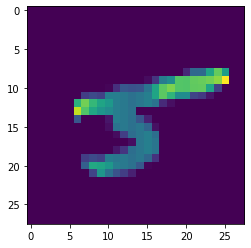

In [44]:
# VERIFICA VALOR

verifica_valor = np.reshape(X_testr[56], (28,28))
plt.imshow(verifica_valor)

In [46]:
# TESTANDO PREDIÇÃO

print(np.argmax(predictions[6]))

0


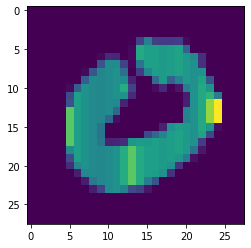

In [47]:
# VERIFICA VALOR

verifica_valor = np.reshape(X_testr[6], (28,28))
plt.imshow(verifica_valor)

In [48]:
# TESTANDO PREDIÇÃO

print(np.argmax(predictions[0]))

0


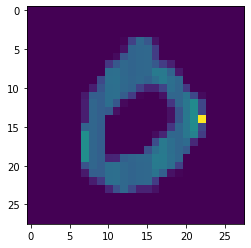

In [49]:
# VERIFICA VALOR

verifica_valor = np.reshape(X_testr[0], (28,28))
plt.imshow(verifica_valor)

# AQUI PODEMOS TESTAR COM IMAGEMS FEITAS POR NÓS MESMOS

Basta desenharmos um número, por exemplo, no paint e salvar, e depois seguindo as intruções podemos usar o modelo para predizer o valor desenhado na imagem.

In [17]:
import cv2 

In [24]:
print(np.argmax(predictions[178]))

1


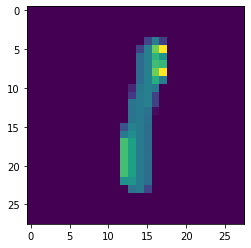

In [25]:
plt.imshow(X_test[178])

In [ ]:
img = cv2.imread("oito.png")

In [ ]:
plt.imshow()

In [ ]:
resized =(gray, (28,28), interpolation = cv2.INTER_AREA )

In [ ]:
img.shape

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BRG2GRAY)

In [ ]:
gray.shape

In [ ]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [ ]:
resized.shape

In [ ]:
newimg = tf.keras.utils.normalize (resized, axis = 1)

In [ ]:
newing = np.array(newing).reshape(-1)